In [1]:
import io
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

0 [4.78613630e-01 5.05213946e-01 2.44962031e-04]
1 [0.42922938 0.50199685 0.01073081]
2 [0.4212188  0.49624874 0.01192252]
3 [0.42742692 0.49806866 0.00726328]
4 [0.35555551 0.49401532 0.01032544]
5 [0.49683089 0.49431786 0.00119215]
6 [0.38177374 0.49406518 0.01084709]
7 [0.4177898  0.49623897 0.00985244]
8 [0.40307068 0.50215594 0.01279616]
9 [0.42899528 0.49439139 0.01148518]
10 [0.37515034 0.49418972 0.0126418 ]
11 [0.48606506 0.49684654 0.00530222]
12 [0.37396016 0.49535041 0.00853781]
14 [0.41887078 0.49421906 0.00351212]
15 [0.47849803 0.50453171 0.01044122]
16 [0.39489392 0.50267081 0.00510495]
17 [0.46276254 0.50585447 0.0006799 ]
18 [0.38865807 0.50316364 0.00682812]
19 [0.45087141 0.50140588 0.00995242]
21 [0.41627721 0.50395062 0.00791414]
22 [4.32420729e-01 4.96519067e-01 5.77315498e-05]
23 [0.48255802 0.50067251 0.01095051]
24 [0.46934507 0.5026125  0.00956747]
25 [0.48905509 0.50381852 0.01204883]
26 [0.48355016 0.50231712 0.01160266]
27 [0.35681672 0.49690202 0.00737396

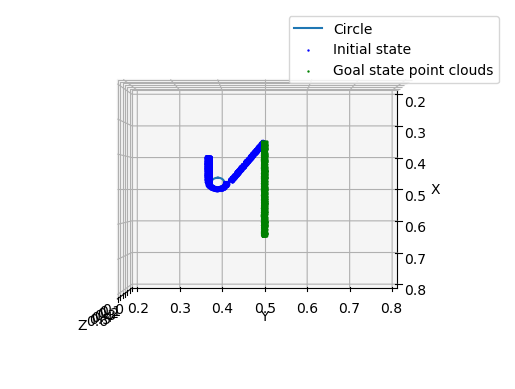

Visualizing goal state pattern 2:


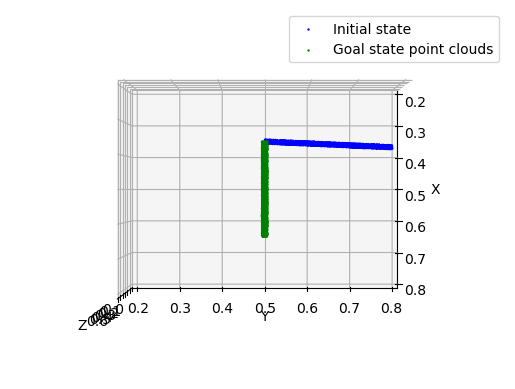

Visualizing goal state pattern 3:


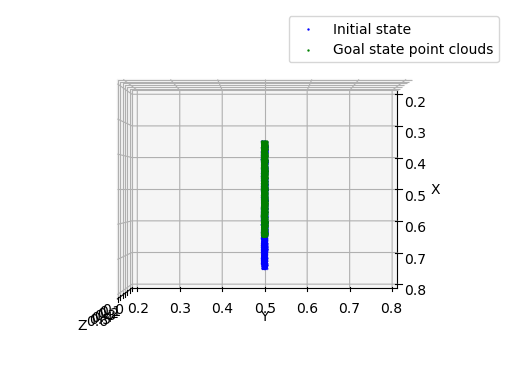

In [327]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the range of the initial state of the rope
x_range = [0.35, 0.65]
y_range = [0.4935, 0.5065]
z_range = [0, 0.013]
stick_radius = 0.015

# Calculate the initial state points of the rope
NUM_POINTS = 3000
width = [x_range[1] - x_range[0], y_range[1] - y_range[0], z_range[1] - z_range[0]]
init_pos = [(x_range[0]+x_range[1])/2, (y_range[0]+y_range[1])/2, (z_range[0]+z_range[1])/2]
rope_initial_state = (np.random.random((NUM_POINTS, 3)) * 2 - 1) * (0.5 * np.array(width)) + np.array(init_pos)
rope_length = x_range[1] - x_range[0]

def sample_point_in_circle(angle):
    angle_radians = math.radians(angle)
    center = [x_range[0], (y_range[0] + y_range[1]) / 2]
    radius = 0.6 * rope_length
    r = math.sqrt(random.uniform(0, radius**2))  # Use the square root to maintain uniform distribution
    x = center[0] + r * math.cos(angle_radians)
    y = center[1] + r * math.sin(angle_radians)
    return np.array([x, y, 0])

def closest_tangent_point(add_stick_pos):
    center = [x_range[0], (y_range[0] + y_range[1]) / 2]
    l = stick_radius + (y_range[1] - y_range[0])/2
    X = add_stick_pos[0]
    Y = add_stick_pos[1]
    x = center[0]
    y = center[1]

    def points_of_tangency():
        distance = math.sqrt((X - x)**2 + (Y - y)**2)

        if distance <= l:
            return None

        ratio = l / distance
        M_x = X + (x - X) * ratio
        M_y = Y + (y - Y) * ratio

        d = math.sqrt(l**2 - (l * ratio)**2)
        perpendicular_x = (Y - y)
        perpendicular_y = -(X - x)

        norm = math.sqrt(perpendicular_x**2 + perpendicular_y**2)
        perpendicular_x /= norm
        perpendicular_y /= norm

        T1_x = M_x + d * perpendicular_x
        T1_y = M_y + d * perpendicular_y

        T2_x = M_x - d * perpendicular_x
        T2_y = M_y - d * perpendicular_y

        return (T1_x, T1_y), (T2_x, T2_y)

    tangent_points = points_of_tangency()
    if tangent_points is None:
        return None

    T1, T2 = tangent_points

    if abs(T1[1] - y) < abs(T2[1] - y):
        return T1
    else:
        return T2

def goal_state_pattern1(tangent_point, add_stick_pos):
    # rope1
    rope1_length = math.sqrt((x_range[0] - tangent_point[0])**2 + ((y_range[0] + y_range[1]) / 2 - tangent_point[1])**2)
    width = [rope1_length, y_range[1] - y_range[0], z_range[1] - z_range[0]]
    init_pos = [x_range[0]+rope1_length/2, (y_range[0]+y_range[1])/2, (z_range[0]+z_range[1])/2]
    rope1_num_points = int(NUM_POINTS/rope_length*rope1_length)
    rope1_state = (np.random.random((rope1_num_points, 3)) * 2 - 1) * (0.5 * np.array(width)) + np.array(init_pos)
    angle_radians = math.atan2(tangent_point[1] - (y_range[0] + y_range[1]) / 2, tangent_point[0] - x_range[0])

    pivot_point = np.array([x_range[0], (y_range[0] + y_range[1]) / 2, (z_range[0] + z_range[1]) / 2])
    rotated_rope1 = np.zeros((rope1_num_points, 3))

    for i in range(rope1_num_points):
        point = rope1_state[i] - pivot_point
        rotated_x = point[0] * math.cos(angle_radians) - point[1] * math.sin(angle_radians)
        rotated_y = point[0] * math.sin(angle_radians) + point[1] * math.cos(angle_radians)
        if rotated_y < 0:
            print(i, rope1_state[i])
        rotated_rope1[i] = np.array([rotated_x, rotated_y, point[2]]) + pivot_point
    
    # rope2
    if add_stick_pos[1] > 0.5:
        rope2_pos = add_stick_pos + np.array([0, stick_radius + (y_range[1] - y_range[0])/2, 0])
    else:
        rope2_pos = add_stick_pos - np.array([0, stick_radius + (y_range[1] - y_range[0])/2, 0])
    radius = stick_radius + (y_range[1] - y_range[0])/2
    angle1 = math.atan2(tangent_point[1] - add_stick_pos[1], tangent_point[0] - add_stick_pos[0])
    angle2 = math.atan2(rope2_pos[1] - add_stick_pos[1], rope2_pos[0] - add_stick_pos[0])
    delta_angle = angle2 - angle1

    if abs(delta_angle) > math.pi:
        delta_angle += math.copysign(2 * math.pi, -delta_angle)
    
    if delta_angle > 0 and add_stick_pos[1] < 0.5:
        delta_angle -= 2 * math.pi
    if delta_angle < 0 and add_stick_pos[1] > 0.5:
        delta_angle += 2 * math.pi
    
    arc_length = abs(radius * delta_angle)
    rope2_num_points = int(NUM_POINTS/rope_length*arc_length)
    
    points_on_arc = []
    points_around_arc = []

    for _ in range(rope2_num_points):
        t = random.uniform(0, delta_angle)
        
        x_on_arc = add_stick_pos[0] + radius * math.cos(angle1 + t)
        y_on_arc = add_stick_pos[1] + radius * math.sin(angle1 + t)
        z_on_arc = random.uniform(z_range[0], z_range[1])
        points_on_arc.append((x_on_arc, y_on_arc, z_on_arc))
        
        r = radius + random.uniform(-(y_range[1] - y_range[0])/2, (y_range[1] - y_range[0])/2)
        x_around_arc = add_stick_pos[0] + r * math.cos(angle1 + t)
        y_around_arc = add_stick_pos[1] + r * math.sin(angle1 + t)
        z_around_arc = random.uniform(z_range[0], z_range[1])
        points_around_arc.append((x_around_arc, y_around_arc, z_around_arc))
    rope2_points = np.array(points_around_arc)

    # rope3
    rest_rope_length = rope_length - rope1_length - arc_length
    width = [rest_rope_length, y_range[1] - y_range[0], z_range[1] - z_range[0]]
    init_pos = [rope2_pos[0]-rest_rope_length/2, rope2_pos[1], (z_range[0]+z_range[1])/2]
    rope3_num_points = int(NUM_POINTS/rest_rope_length*rope1_length)
    rope3_state = (np.random.random((rope3_num_points, 3)) * 2 - 1) * (0.5 * np.array(width)) + np.array(init_pos)

    return np.concatenate([rotated_rope1, rope2_points, rope3_state])

def goal_state_pattern2(angle):
    angle_radians = math.radians(angle)
    pivot_point = np.array([x_range[0], (y_range[0] + y_range[1]) / 2, (z_range[0] + z_range[1]) / 2])
    rotated_rope = np.zeros((NUM_POINTS, 3))

    for i in range(NUM_POINTS):
        point = rope_initial_state[i] - pivot_point
        rotated_x = point[0] * math.cos(angle_radians) - point[1] * math.sin(angle_radians)
        rotated_y = point[0] * math.sin(angle_radians) + point[1] * math.cos(angle_radians)
        rotated_rope[i] = np.array([rotated_x, rotated_y, point[2]]) + pivot_point

    return rotated_rope

def goal_state_pattern3(extension_ratio):
    x_range[1] *= extension_ratio

    width = [x_range[1] - x_range[0], y_range[1] - y_range[0], z_range[1] - z_range[0]]
    init_pos = [(x_range[0]+x_range[1])/2, (y_range[0]+y_range[1])/2, (z_range[0]+z_range[1])/2]

    goal_state = (np.random.random((NUM_POINTS, 3)) * 2 - 1) * (0.5 * np.array(width)) + np.array(init_pos)
    return goal_state

def visualize_goal_state(initial_state, goal_state, add_stick=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    if add_stick is not None:
        # Visualize the sampled point and the circle
        theta = np.linspace(-math.pi, math.pi, 100)
        circle_x = add_stick[0] + stick_radius * np.cos(theta)
        circle_y = add_stick[1] + stick_radius * np.sin(theta)
        plt.plot(circle_x, circle_y, label='Circle')

    ax.scatter(initial_state[:, 0], initial_state[:, 1], initial_state[:, 2], c='blue', s=0.5, label='Initial state')
    ax.scatter(goal_state[:, 0], goal_state[:, 1], goal_state[:, 2], c='green', s=0.5, label='Goal state point clouds')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(0.2, 0.8)
    ax.set_ylim(0.2, 0.8)
    ax.set_zlim(0, 0.6)
    ax.view_init(90, 0)

    plt.legend()
    plt.show()

angle_ranges = [(-70, -30), (30, 70)]
selected_range = random.choice(angle_ranges)
stick_angle = random.uniform(selected_range[0], selected_range[1])
add_stick_pos = sample_point_in_circle(stick_angle)
tangent_point = closest_tangent_point(add_stick_pos)
goal_state1 = goal_state_pattern1(tangent_point, add_stick_pos)

angle_ranges = [(-90, -30), (30, 90)]
selected_range = random.choice(angle_ranges)
rot_angle = random.uniform(selected_range[0], selected_range[1])
goal_state2 = goal_state_pattern2(rot_angle)

extension_ratio = random.uniform(1.1, 1.2)
goal_state3 = goal_state_pattern3(extension_ratio)

print("Visualizing goal state pattern 1:")
visualize_goal_state(goal_state1, rope_initial_state, add_stick_pos)

print("Visualizing goal state pattern 2:")
visualize_goal_state(goal_state2, rope_initial_state)

print("Visualizing goal state pattern 3:")
visualize_goal_state(goal_state3, rope_initial_state, )

Visualizing goal state pattern 1:


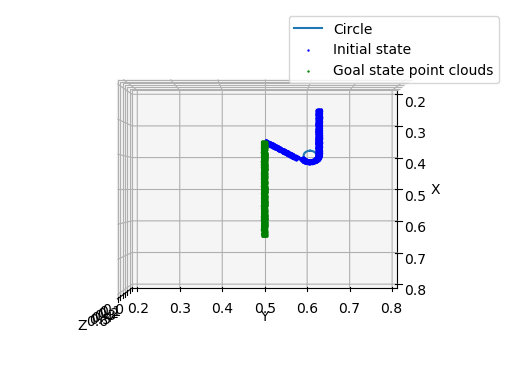

In [340]:
# Define the range of the initial state of the rope
x_range = [0.35, 0.65]
y_range = [0.4935, 0.5065]
z_range = [0, 0.013]
stick_radius = 0.015

# Calculate the initial state points of the rope
NUM_POINTS = 3000
width = [x_range[1] - x_range[0], y_range[1] - y_range[0], z_range[1] - z_range[0]]
init_pos = [(x_range[0]+x_range[1])/2, (y_range[0]+y_range[1])/2, (z_range[0]+z_range[1])/2]
rope_initial_state = (np.random.random((NUM_POINTS, 3)) * 2 - 1) * (0.5 * np.array(width)) + np.array(init_pos)
rope_length = x_range[1] - x_range[0]

def sample_point_in_circle(angle):
    angle_radians = math.radians(angle)
    center = [x_range[0], (y_range[0] + y_range[1]) / 2]
    radius = 0.6 * rope_length
    r = math.sqrt(random.uniform(0, radius**2))  # Use the square root to maintain uniform distribution
    x = center[0] + r * math.cos(angle_radians)
    y = center[1] + r * math.sin(angle_radians)
    return np.array([x, y, 0])

def closest_tangent_point(add_stick_pos):
    center = [x_range[0], (y_range[0] + y_range[1]) / 2]
    l = stick_radius + (y_range[1] - y_range[0])/2
    X = add_stick_pos[0]
    Y = add_stick_pos[1]
    x = center[0]
    y = center[1]

    def points_of_tangency():
        distance = math.sqrt((X - x)**2 + (Y - y)**2)

        if distance <= l:
            return None

        ratio = l / distance
        M_x = X + (x - X) * ratio
        M_y = Y + (y - Y) * ratio

        d = math.sqrt(l**2 - (l * ratio)**2)
        perpendicular_x = (Y - y)
        perpendicular_y = -(X - x)

        norm = math.sqrt(perpendicular_x**2 + perpendicular_y**2)
        perpendicular_x /= norm
        perpendicular_y /= norm

        T1_x = M_x + d * perpendicular_x
        T1_y = M_y + d * perpendicular_y

        T2_x = M_x - d * perpendicular_x
        T2_y = M_y - d * perpendicular_y

        return (T1_x, T1_y), (T2_x, T2_y)

    tangent_points = points_of_tangency()
    if tangent_points is None:
        return None

    T1, T2 = tangent_points

    if abs(T1[1] - y) < abs(T2[1] - y):
        return T1
    else:
        return T2

def goal_state_pattern1(tangent_point, add_stick_pos):
    # rope1
    rope1_length = math.sqrt((x_range[0] - tangent_point[0])**2 + ((y_range[0] + y_range[1]) / 2 - tangent_point[1])**2)
    width = [rope1_length, y_range[1] - y_range[0], z_range[1] - z_range[0]]
    init_pos = [x_range[0]+rope1_length/2, (y_range[0]+y_range[1])/2, (z_range[0]+z_range[1])/2]
    rope1_num_points = int(NUM_POINTS/rope_length*rope1_length)
    rope1_state = (np.random.random((rope1_num_points, 3)) * 2 - 1) * (0.5 * np.array(width)) + np.array(init_pos)
    angle_radians = math.atan2(tangent_point[1] - (y_range[0] + y_range[1]) / 2, tangent_point[0] - x_range[0])

    pivot_point = np.array([x_range[0], (y_range[0] + y_range[1]) / 2, (z_range[0] + z_range[1]) / 2])
    rotated_rope1 = np.zeros((rope1_num_points, 3))

    for i in range(rope1_num_points):
        point = rope1_state[i] - pivot_point
        rotated_x = point[0] * math.cos(angle_radians) - point[1] * math.sin(angle_radians)
        rotated_y = point[0] * math.sin(angle_radians) + point[1] * math.cos(angle_radians)
        rotated_rope1[i] = np.array([rotated_x, rotated_y, point[2]]) + pivot_point
    
    # rope2
    if add_stick_pos[1] > 0.5:
        rope2_pos = add_stick_pos + np.array([0, stick_radius + (y_range[1] - y_range[0])/2, 0])
    else:
        rope2_pos = add_stick_pos - np.array([0, stick_radius + (y_range[1] - y_range[0])/2, 0])
    radius = stick_radius + (y_range[1] - y_range[0])/2
    angle1 = math.atan2(tangent_point[1] - add_stick_pos[1], tangent_point[0] - add_stick_pos[0])
    angle2 = math.atan2(rope2_pos[1] - add_stick_pos[1], rope2_pos[0] - add_stick_pos[0])
    delta_angle = angle2 - angle1

    if abs(delta_angle) > math.pi:
        delta_angle += math.copysign(2 * math.pi, -delta_angle)
    
    if delta_angle > 0 and add_stick_pos[1] < 0.5:
        delta_angle -= 2 * math.pi
    if delta_angle < 0 and add_stick_pos[1] > 0.5:
        delta_angle += 2 * math.pi
    
    arc_length = abs(radius * delta_angle)
    rope2_num_points = int(NUM_POINTS/rope_length*arc_length)
    
    points_on_arc = []
    points_around_arc = []

    for _ in range(rope2_num_points):
        t = random.uniform(0, delta_angle)
        
        x_on_arc = add_stick_pos[0] + radius * math.cos(angle1 + t)
        y_on_arc = add_stick_pos[1] + radius * math.sin(angle1 + t)
        z_on_arc = random.uniform(z_range[0], z_range[1])
        points_on_arc.append((x_on_arc, y_on_arc, z_on_arc))
        
        r = radius + random.uniform(-(y_range[1] - y_range[0])/2, (y_range[1] - y_range[0])/2)
        x_around_arc = add_stick_pos[0] + r * math.cos(angle1 + t)
        y_around_arc = add_stick_pos[1] + r * math.sin(angle1 + t)
        z_around_arc = random.uniform(z_range[0], z_range[1])
        points_around_arc.append((x_around_arc, y_around_arc, z_around_arc))
    rope2_points = np.array(points_around_arc)

    # rope3
    rest_rope_length = rope_length - rope1_length - arc_length
    width = [rest_rope_length, y_range[1] - y_range[0], z_range[1] - z_range[0]]
    init_pos = [rope2_pos[0]-rest_rope_length/2, rope2_pos[1], (z_range[0]+z_range[1])/2]
    rope3_num_points = int(NUM_POINTS/rest_rope_length*rope1_length)
    rope3_state = (np.random.random((rope3_num_points, 3)) * 2 - 1) * (0.5 * np.array(width)) + np.array(init_pos)

    return np.concatenate([rotated_rope1, rope2_points, rope3_state])

def visualize_goal_state(initial_state, goal_state, add_stick=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    if add_stick is not None:
        # Visualize the sampled point and the circle
        theta = np.linspace(-math.pi, math.pi, 100)
        circle_x = add_stick[0] + stick_radius * np.cos(theta)
        circle_y = add_stick[1] + stick_radius * np.sin(theta)
        plt.plot(circle_x, circle_y, label='Circle')

    ax.scatter(initial_state[:, 0], initial_state[:, 1], initial_state[:, 2], c='blue', s=0.5, label='Initial state')
    ax.scatter(goal_state[:, 0], goal_state[:, 1], goal_state[:, 2], c='green', s=0.5, label='Goal state point clouds')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(0.2, 0.8)
    ax.set_ylim(0.2, 0.8)
    ax.set_zlim(0, 0.6)
    ax.view_init(90, 0)

    plt.legend()
    plt.show()

angle_ranges = [(-70, -30), (30, 70)]
selected_range = random.choice(angle_ranges)
stick_angle = random.uniform(selected_range[0], selected_range[1])
add_stick_pos = sample_point_in_circle(stick_angle)
tangent_point = closest_tangent_point(add_stick_pos)
goal_state1 = goal_state_pattern1(tangent_point, add_stick_pos)



print("Visualizing goal state pattern 1:")
visualize_goal_state(goal_state1, rope_initial_state, add_stick_pos)


In [342]:
goal_state1[goal_state1[:, 0] < 0.1, :]

array([], shape=(0, 3), dtype=float64)

In [336]:
goal_state1

array([[0.40682174, 0.55159133, 0.0093437 ],
       [0.43464649, 0.56880232, 0.00460307],
       [0.42973421, 0.57329756, 0.01046904],
       ...,
       [0.42956419, 0.62615893, 0.0057854 ],
       [0.32129014, 0.63028819, 0.00761784],
       [0.36712571, 0.62192602, 0.00369812]])